# TRABAJO FINAL INTEGRADOR

### NOMBRE: GUIDO PETTINARI

### TUTOR: VALERIA SOLIANI

### UNIVERSIDAD: INSTITUTO TECNOLOGICO DE BUENOS AIRES (ITBA)

**El Trabajo se dividirá en**:

    1) Análisis Exploratorio Descriptivo
    2) Feature Engineering o Preparación de Datos
    3) Modelos Predictivos: Probaremos diferentes algoritmos predictivos

### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            roc_auc_score, \
                            make_scorer,f1_score,classification_report,roc_curve, auc
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import interp
import seaborn as sns
import numpy as np
from mlxtend.evaluate import lift_score
import csv
from funpymodeling.exploratory import status
import matplotlib.pyplot as plt
from itertools import cycle

### Load CSVs

In [2]:
data_base = pd.read_csv('data_base.csv')
data_ohe = pd.read_csv('data_ohe.csv')
data_ohe_corr = pd.read_csv('data_ohe_corr.csv')
data_ohe_out = pd.read_csv('data_ohe_out.csv')
data_ohe_corr_out = pd.read_csv('data_ohe_out_corr.csv')
data_out = pd.read_csv('data_out.csv')
data_corr = pd.read_csv('data_corr.csv')
data_out_corr = pd.read_csv('data_out_corr.csv')
data_index = pd.read_csv('data_index.csv')


### Split All DF in Train and Test

In [3]:
data_base_X = data_base.drop(['MonthlyIncome_cat_encode'],axis=1)
data_base_y = data_base[['MonthlyIncome_cat_encode']]
data_ohe_X = data_ohe.drop(['MonthlyIncome_cat_encode'],axis=1)
data_ohe_y = data_ohe[['MonthlyIncome_cat_encode']]
data_ohe_corr_X = data_ohe_corr.drop(['MonthlyIncome_cat_encode'],axis=1)
data_ohe_corr_y = data_ohe_corr[['MonthlyIncome_cat_encode']]
data_ohe_out_X = data_ohe_out.drop(['MonthlyIncome_cat_encode'],axis=1)
data_ohe_out_y = data_ohe_out[['MonthlyIncome_cat_encode']]
data_ohe_corr_out_X = data_ohe_corr_out.drop(['MonthlyIncome_cat_encode'],axis=1)
data_ohe_corr_out_y = data_ohe_corr_out[['MonthlyIncome_cat_encode']]
data_out_X = data_out.drop(['MonthlyIncome_cat_encode'],axis=1)
data_out_y = data_out[['MonthlyIncome_cat_encode']]
data_corr_X = data_corr.drop(['MonthlyIncome_cat_encode'],axis=1)
data_corr_y = data_corr[['MonthlyIncome_cat_encode']]
data_out_corr_X = data_out_corr.drop(['MonthlyIncome_cat_encode'],axis=1)
data_out_corr_y = data_out_corr[['MonthlyIncome_cat_encode']]
n_classes=4

In [4]:
# data_base

data_base_X_train, data_base_X_test, data_base_y_train, \
                                     data_base_y_test = train_test_split(data_base_X, data_base_y, test_size=0.3, random_state=42)

#data_ohe
data_ohe_X_train, data_ohe_X_test, data_ohe_y_train, \
                                   data_ohe_y_test = train_test_split(data_ohe_X, data_ohe_y, test_size=0.3, random_state=42)

#data_ohe_corr
data_ohe_corr_X_train, data_ohe_corr_X_test, data_ohe_corr_y_train, \
                       data_ohe_corr_y_test = train_test_split(data_ohe_corr_X, data_ohe_corr_y, test_size=0.3, random_state=42)

# data_ohe_out
data_ohe_out_X_train, data_ohe_out_X_test, data_ohe_out_y_train, \
                      data_ohe_out_y_test = train_test_split(data_ohe_out_X, data_ohe_out_y, test_size=0.3, random_state=42)

# data_ohe_corr_out
data_ohe_corr_out_X_train, data_ohe_corr_out_X_test, data_ohe_corr_out_y_train, \
                           data_ohe_corr_out_y_test = train_test_split(data_ohe_corr_out_X, data_ohe_corr_out_y, test_size=0.3, random_state=42)

# data_out
data_out_X_train, data_out_X_test, data_out_y_train, \
                           data_out_y_test = train_test_split(data_out_X, data_out_y, test_size=0.3, random_state=42)

# data_corr
data_corr_X_train, data_corr_X_test, data_corr_y_train, \
                           data_corr_y_test = train_test_split(data_corr_X, data_corr_y, test_size=0.3, random_state=42)

# data_out_corr
data_out_corr_X_train, data_out_corr_X_test, data_out_corr_y_train, \
                           data_out_corr_y_test = train_test_split(data_out_corr_X, data_out_corr_y, test_size=0.3, random_state=42)

### Normalization (Al ser regresión logistica no trabajaremos sin ohe)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

#scaler.fit(data_base_X_train)
#data_base_X_train = scaler.transform(data_base_X_train)
#data_base_X_test = scaler.transform(data_base_X_test)


scaler.fit(data_ohe_X_train)
data_ohe_X_train = scaler.transform(data_ohe_X_train)
data_ohe_X_test = scaler.transform(data_ohe_X_test)


scaler.fit(data_ohe_corr_X_train)
data_ohe_corr_X_train = scaler.transform(data_ohe_corr_X_train)
data_ohe_corr_X_test = scaler.transform(data_ohe_corr_X_test)


scaler.fit(data_ohe_out_X_train)
data_ohe_out_X_train = scaler.transform(data_ohe_out_X_train)
data_ohe_out_X_test = scaler.transform(data_ohe_out_X_test)

scaler.fit(data_ohe_corr_out_X_train)
data_ohe_corr_out_X_train = scaler.transform(data_ohe_corr_out_X_train)
data_ohe_corr_out_X_test = scaler.transform(data_ohe_corr_out_X_test)


#scaler.fit(data_out_X_train)
#data_out_X_train = scaler.transform(data_out_X_train)
#data_out_X_test = scaler.transform(data_out_X_test)

#scaler.fit(data_corr_X_train)
#data_corr_X_train = scaler.transform(data_corr_X_train)
#data_corr_X_test = scaler.transform(data_corr_X_test)

#scaler.fit(data_out_corr_X_train)
#data_out_corr_X_train = scaler.transform(data_out_corr_X_train)
#data_out_corr_X_test = scaler.transform(data_out_corr_X_test)

### Grid Search

In [6]:
# penalty
penalty = ['l2']
# Number of features to consider at every split
fit_intercept = [True, False]
# Regularization
C = [.001, .01, .1, 1, 10, 100, 1000]
max_iter = range(0,2000,25)


random_grid = {'penalty': penaltyty,
               'fit_intercept': fit_intercept,
               'C': C,
               'max_iter':max_iter}
               
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf}
               #'bootstrap': bootstrap}
print(random_grid)


{'penalty': ['l2'], 'fit_intercept': [True, False], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': range(0, 2000, 25)}


In [10]:




scoring = {'lift':make_scorer(lift_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'f1_score':make_scorer(f1_score, average='macro'),
           'accuracy': make_scorer(accuracy_score),
           'recall':make_scorer(recall_score,average='macro'),
           'roc_auc_ovr':'roc_auc_ovr'}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
log_reg = LogisticRegression(random_state=10)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = log_reg, 
                               param_grid = random_grid,
                               scoring = scoring,
                               refit='accuracy',
                               cv = 5, 
                               verbose=1, 
                               n_jobs = -1)


# list dataframes train that Random Forest accepts
list_dataframes_train = [#[data_base_X_train, data_base_X_test],
                         [data_ohe_X_train, data_ohe_y_train],
                         [data_ohe_corr_X_train, data_ohe_corr_y_train],
                         [data_ohe_out_X_train, data_ohe_out_y_train],
                         [data_ohe_corr_out_X_train, data_ohe_corr_out_y_train]
                         #[data_out_X, data_out_y],
                         #[data_corr_X, data_corr_y],
                         #[data_out_corr_X, data_out_corr_y]
                         ]

# list dataframes train that Random Forest accepts
list_dataframes_test = [#[data_base_X_train, data_base_X_test],
                         [data_ohe_X_test, data_ohe_y_test],
                         [data_ohe_corr_X_test, data_ohe_corr_y_test],
                         [data_ohe_out_X_test, data_ohe_out_y_test],
                         [data_ohe_corr_out_X_test, data_ohe_corr_out_y_test]
                         #[data_out_X, data_out_y],
                         #[data_corr_X, data_corr_y],
                         #[data_out_corr_X, data_out_corr_y]
                         ]


list_dataframes_names = ['data_ohe','data_ohe_corr','data_ohe_out','data_ohe_corr_out']

In [9]:
# Fit the random search model
df = pd.DataFrame()
for i in range(0,len(list_dataframes_train)):
    #Entreno sobre mis dataframes train  
    rf_random.fit(list_dataframes_train[i][0], list_dataframes_train[i][1].values.ravel())
    len_name = len(rf_random.cv_results_['mean_test_accuracy'])
    name = [list_dataframes_names[i]]*len_name

    train_results = pd.concat([
                     pd.DataFrame(name,columns=['dataframe']),
                     pd.DataFrame(rf_random.cv_results_['params']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_lift'],columns=['lift']),          
                     pd.DataFrame(rf_random.cv_results_['mean_test_accuracy'],columns=['accuracy']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_precision'],columns=['precision_score']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_recall'],columns=['recall']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_f1_score'],columns=['f1_score']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_roc_auc_ovr'],columns=['roc_auc_ovr'])],axis=1).sort_values('lift',ascending=False)
    df = df.append(train_results) 
df.to_csv('train_logReg_results_v3.csv',index=False)

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 2304 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 2922 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3472 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4122 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5600 out of 5600 | elapsed:  7.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1120 candidates, totalling 5600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 2272 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 2914 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 3464 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4114 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4864 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5600 out of 5600 | elapsed:  7.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1120 candidates, totalling 5600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 2480 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 2978 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4178 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4928 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 5600 out of 5600 | elapsed:  8.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1120 candidates, totalling 5600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 3424 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4074 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4824 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 5600 out of 5600 | elapsed:  7.8min finished


In [6]:
# A continuación correremos con los parametros que nos dió mejor resultado tanto el training como el testing y los graficaremos 
# con una curva de ROC

# Use the random grid to search for best hyperparameters
# First create the base model to tune
lg = LogisticRegression(
                        C= 10,
                        penalty='l2',
                        fit_intercept= False,
                        max_iter=75,
                        random_state=10)


lg.fit(data_ohe_X_train, data_ohe_y_train)


C:\Users\guido\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\guido\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=75,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Classification report

In [7]:





y_pred_tr = lg.predict(data_ohe_X_train)
y_pred_ts = lg.predict(data_ohe_X_test)

print('ACCURACY TRAIN:' + str(accuracy_score(data_ohe_y_train,y_pred_tr)))
print('ACCURACY TEST:' + str(accuracy_score(data_ohe_y_test,y_pred_ts)))
print('PRECISION TRAIN:' + str(precision_score(data_ohe_y_train,y_pred_tr,average='weighted')))
print('PRECISION TEST:' + str(precision_score(data_ohe_y_test,y_pred_ts,average='weighted')))
print('RECALL TRAIN:' + str(recall_score(data_ohe_y_train,y_pred_tr,average='weighted')))
print('RECALL TEST:' + str(recall_score(data_ohe_y_test,y_pred_ts,average='weighted')))
print('F1SCORE TRAIN:' + str(f1_score(data_ohe_y_train,y_pred_tr,average='weighted')))
print('F1SCORE TEST:' + str(f1_score(data_ohe_y_test,y_pred_ts,average='weighted')))

print(classification_report(data_ohe_y_train,y_pred_tr))
print(classification_report(data_ohe_y_test,y_pred_ts))

ACCURACY TRAIN:0.7337220602526725
ACCURACY TEST:0.6507936507936508
PRECISION TRAIN:0.7256046448985278
PRECISION TEST:0.6343118549315265
RECALL TRAIN:0.7337220602526725
RECALL TEST:0.6507936507936508
F1SCORE TRAIN:0.7230460876924301
F1SCORE TEST:0.6373034242955603
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       279
           1       0.60      0.42      0.49       262
           2       0.66      0.72      0.68       226
           3       0.91      0.90      0.91       262

    accuracy                           0.73      1029
   macro avg       0.72      0.73      0.72      1029
weighted avg       0.73      0.73      0.72      1029

              precision    recall  f1-score   support

           0       0.63      0.83      0.72        90
           1       0.41      0.29      0.34       104
           2       0.66      0.65      0.66       141
           3       0.83      0.85      0.84       106

    accuracy                 

In [ ]:
# Con el mejor parametro del grid search paso a predecir
#y_pred_tr = rf_random.predict(X_train)
#accuracy_score = accuracy_score(y_train, y_pred_tr)
#precision_score = precision_score(y_train, y_pred_tr)
#recall_score = recall_score(y_train, y_pred_tr)
#roc_auc_score = roc_auc_score(y_train, y_pred_tr)
#lift_score = lift_score(y_train, y_pred_tr)

pd.unique(data_ohe_y_train['MonthlyIncome_cat_encode'])


C:\Users\guido\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\guido\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


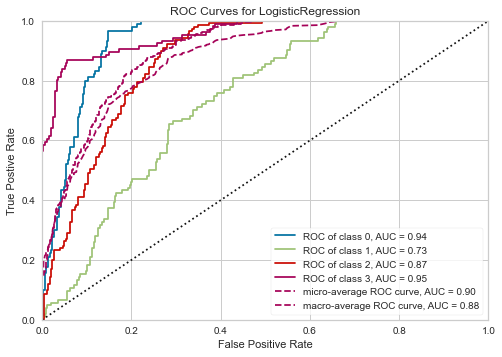

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [8]:
from yellowbrick.classifier import ROCAUC,PrecisionRecallCurve,ClassBalance
from yellowbrick.target import FeatureCorrelation

visualizer = ROCAUC(lg, classes=["0","1","2","3"])

visualizer.fit(data_ohe_X_train,data_ohe_y_train)
visualizer.score(data_ohe_X_test,data_ohe_y_test)
visualizer.show()